# EDA - Clash Royale Dataset

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [44]:
df_clash = pd.read_parquet("../data/clash_royale.parquet")

## Unusual columns

In [45]:
df_clash.columns

Index(['Unnamed: 0', 'battleTime', 'arena.id', 'gameMode.id',
       'average.startingTrophies', 'winner.tag', 'winner.startingTrophies',
       'winner.trophyChange', 'winner.crowns', 'winner.kingTowerHitPoints',
       'winner.princessTowersHitPoints', 'winner.clan.tag',
       'winner.clan.badgeId', 'loser.tag', 'loser.startingTrophies',
       'loser.trophyChange', 'loser.crowns', 'loser.kingTowerHitPoints',
       'loser.clan.tag', 'loser.clan.badgeId', 'loser.princessTowersHitPoints',
       'tournamentTag', 'winner.card1.id', 'winner.card1.level',
       'winner.card2.id', 'winner.card2.level', 'winner.card3.id',
       'winner.card3.level', 'winner.card4.id', 'winner.card4.level',
       'winner.card5.id', 'winner.card5.level', 'winner.card6.id',
       'winner.card6.level', 'winner.card7.id', 'winner.card7.level',
       'winner.card8.id', 'winner.card8.level', 'winner.cards.list',
       'winner.totalcard.level', 'winner.troop.count',
       'winner.structure.count', 'winner.

The only column that seems out of the ordinary is "Unnamed: 0." 

In [46]:
df_clash['Unnamed: 0'].head()

0    0
1    1
2    2
3    3
4    4
Name: Unnamed: 0, dtype: int64

In [47]:
len(df_clash['Unnamed: 0'].unique()) == len(df_clash)

True

We can safely remove this column because it is just a sequential row index that got saved to the csv file and could accidentally introduce outcome leakage if the dataset is in chronological order of games played.

## Missing/null Values

In [48]:
cols_with_nulls = (df_clash.isnull().mean() * 100)
cols_with_nulls = cols_with_nulls[cols_with_nulls > 0].sort_values(ascending=False)
cols_with_nulls

tournamentTag                     100.000000
loser.princessTowersHitPoints      51.791748
loser.kingTowerHitPoints           27.775970
loser.clan.tag                      5.315975
loser.clan.badgeId                  5.315975
winner.clan.tag                     4.103662
winner.clan.badgeId                 4.103662
winner.princessTowersHitPoints      2.053248
dtype: float64

Tournament tag is an empty column which means that all of the games in the dataset are regular ladder/casual matches, so this column would be safe to remove.

The loser princess tower hit points column is missing over 50% of its data. However this could be due to game mechanics rather than incomplete data, since a destroyed tower (hitpoints = 0) could be recorded as null. The same logic can be applied to missing winner princess tower hit points. Further analysis is needed on these columns.

The winner and loser clan tag and clan badge ID columns have around 5% of the column missing. The game allows players to play without joining a clan, and clan metadata won't be significant for our project since we are analyzing cards. Removing these columns would be beneficial because they may overcomplicate and confuse the model.


In [49]:
(df_clash["loser.princessTowersHitPoints"] == 0).sum()

np.int64(0)

In [50]:
(df_clash["winner.princessTowersHitPoints"] == 0).sum()

np.int64(0)

Our suspicions that destroyed towers are recorded as null rather than 0 is correct, since there are no recorded 0's in the columns. During the preprocessing step, we can safely perform constant imputation to replace the nulls in these columns with 0's without affecting model performance.

## Column-by-column Analysis

In [51]:
num_cols = df_clash.select_dtypes(include=["number"]).columns
num_cols

Index(['Unnamed: 0', 'arena.id', 'gameMode.id', 'average.startingTrophies',
       'winner.startingTrophies', 'winner.trophyChange', 'winner.crowns',
       'winner.kingTowerHitPoints', 'winner.clan.badgeId',
       'loser.startingTrophies', 'loser.trophyChange', 'loser.crowns',
       'loser.kingTowerHitPoints', 'loser.clan.badgeId', 'tournamentTag',
       'winner.card1.id', 'winner.card1.level', 'winner.card2.id',
       'winner.card2.level', 'winner.card3.id', 'winner.card3.level',
       'winner.card4.id', 'winner.card4.level', 'winner.card5.id',
       'winner.card5.level', 'winner.card6.id', 'winner.card6.level',
       'winner.card7.id', 'winner.card7.level', 'winner.card8.id',
       'winner.card8.level', 'winner.totalcard.level', 'winner.troop.count',
       'winner.structure.count', 'winner.spell.count', 'winner.common.count',
       'winner.rare.count', 'winner.epic.count', 'winner.legendary.count',
       'winner.elixir.average', 'loser.card1.id', 'loser.card1.level',
    

In [52]:
cat_cols = df_clash.select_dtypes(include=["object", "category"]).columns
cat_cols

Index(['battleTime', 'winner.tag', 'winner.princessTowersHitPoints',
       'winner.clan.tag', 'loser.tag', 'loser.clan.tag',
       'loser.princessTowersHitPoints', 'winner.cards.list',
       'loser.cards.list'],
      dtype='object')

The column split above does not accurately reflect whether a column is categorical or not. For example, pandas identifies the card id columns as numerical because each card has a numerical id but they are, in fact, categorical. Therefore, we performed a manual split.

In [80]:
num_cols = [
    'battleTime',
    'average.startingTrophies', 
    'winner.startingTrophies', 'winner.trophyChange', 'winner.crowns', 
    'winner.kingTowerHitPoints', 'winner.princessTowersHitPoints', 
    'loser.startingTrophies', 'loser.trophyChange', 'loser.crowns', 
    'loser.kingTowerHitPoints', 'loser.princessTowersHitPoints',
    'winner.card1.level', 'winner.card2.level', 'winner.card3.level', 'winner.card4.level', 'winner.card5.level', 'winner.card6.level', 'winner.card7.level', 'winner.card8.level',
    'winner.totalcard.level', 
    'winner.troop.count', 'winner.structure.count', 'winner.spell.count', 'winner.common.count',
    'winner.rare.count', 'winner.epic.count', 'winner.legendary.count',
    'winner.elixir.average', 
    'loser.card1.level', 'loser.card2.level', 'loser.card3.level', 'loser.card4.level', 'loser.card5.level', 'loser.card6.level', 'loser.card7.level', 'loser.card8.level', 
    'loser.totalcard.level',
    'loser.troop.count', 'loser.structure.count', 'loser.spell.count', 'loser.common.count', 
    'loser.rare.count', 'loser.epic.count', 'loser.legendary.count', 
    'loser.elixir.average'
]
cat_cols = [
    'arena.id', 'gameMode.id',
    'winner.tag', 'winner.clan.tag', 'winner.clan.badgeId', 
    'loser.tag', 'loser.clan.tag', 'loser.clan.badgeId', 
    'winner.card1.id', 'winner.card2.id', 'winner.card3.id', 'winner.card4.id', 'winner.card5.id', 'winner.card6.id', 'winner.card7.id', 'winner.card8.id', 
    'winner.cards.list',
    'loser.card1.id', 'loser.card2.id', 'loser.card3.id', 'loser.card4.id', 'loser.card5.id', 'loser.card6.id', 'loser.card7.id', 'loser.card8.id',
    'loser.cards.list'
]

### Numerical Column Analysis

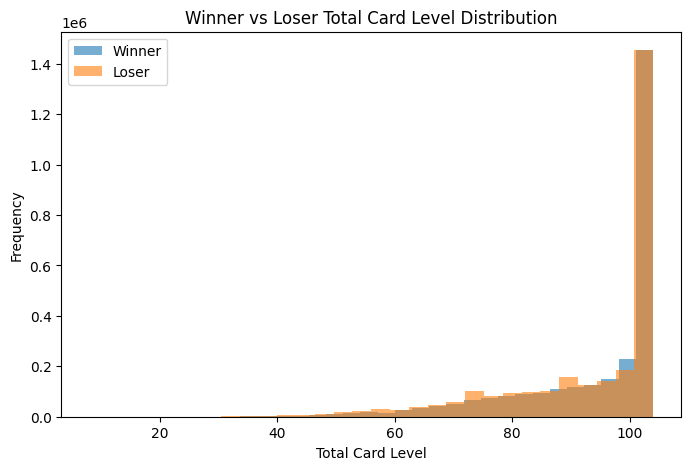

In [56]:
plt.figure(figsize=(8, 5))

plt.hist(df_clash["winner.totalcard.level"], bins=30, alpha=0.6, label="Winner")
plt.hist(df_clash["loser.totalcard.level"], bins=30, alpha=0.6, label="Loser")

plt.xlabel("Total Card Level")
plt.ylabel("Frequency")
plt.title("Winner vs Loser Total Card Level Distribution")
plt.legend()

plt.show()

On average, players have higher card levels.

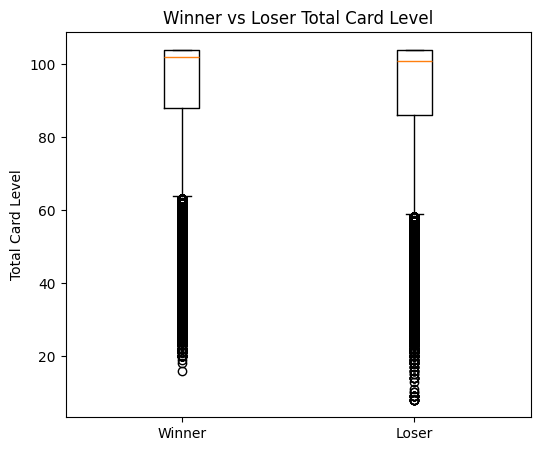

In [65]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 5))

plt.boxplot(
    [df_clash["winner.totalcard.level"],
     df_clash["loser.totalcard.level"]],
    tick_labels=["Winner", "Loser"]
)

plt.ylabel("Total Card Level")
plt.title("Winner vs Loser Total Card Level")
plt.show()

Winners appear to have a slightly higher average total card level, although the distribution is around the same. Because both are heavily skewed left, we may consider applying the Yeo-Johnson transformation which picks the best parameter to make the data closer to normal. However, if we choose to move forward with a decision tree model, we don't need to apply transformations since they use thresholds. We will include the transformation in our EDA step in case we decide to use a regression model.

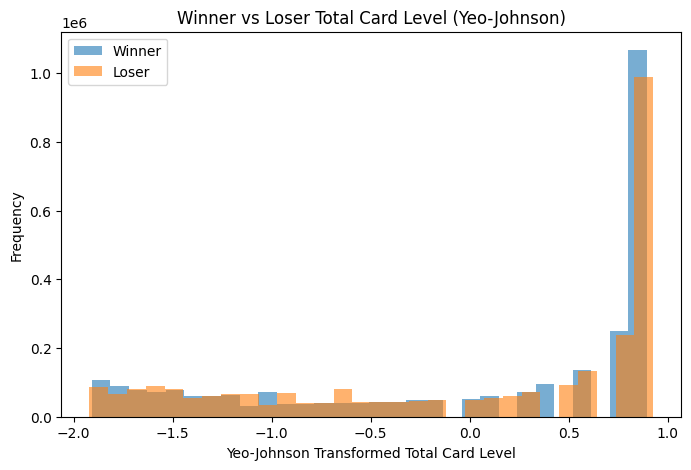

In [61]:
from sklearn.preprocessing import PowerTransformer

winner = df_clash["winner.totalcard.level"].values.reshape(-1, 1)
loser = df_clash["loser.totalcard.level"].values.reshape(-1, 1)

pt_winner = PowerTransformer(method='yeo-johnson')
pt_loser = PowerTransformer(method='yeo-johnson')

winner_yj = pt_winner.fit_transform(winner)
loser_yj = pt_loser.fit_transform(loser)

plt.figure(figsize=(8, 5))

plt.hist(winner_yj, bins=30, alpha=0.6, label="Winner")
plt.hist(loser_yj, bins=30, alpha=0.6, label="Loser")

plt.xlabel("Yeo-Johnson Transformed Total Card Level")
plt.ylabel("Frequency")
plt.title("Winner vs Loser Total Card Level (Yeo-Johnson)")
plt.legend()

plt.show()

In [63]:
import pandas as pd

print("Original skew (winner):", df_clash["winner.totalcard.level"].skew())
print("Transformed skew (winner):", pd.Series(winner_yj.flatten()).skew())

Original skew (winner): -1.5904311744161697
Transformed skew (winner): -0.6506690521498705


The Yeo-Johnson transformation had moderate impact on the skew, transforming it from heavily left skewed to moderately left skewed. 

### Categorical Column Analysis

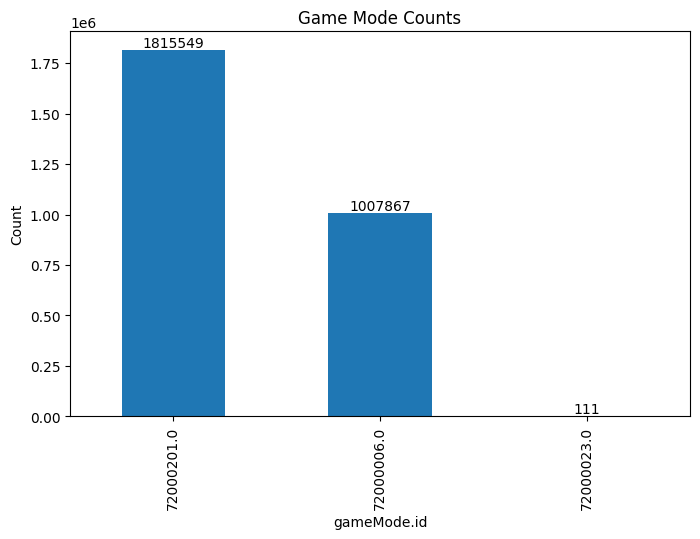

In [54]:
import matplotlib.pyplot as plt

counts = df_clash['gameMode.id'].value_counts()

ax = counts.plot.bar(figsize=(8, 5))

for i, value in enumerate(counts):
    ax.text(i, value, str(value), ha='center', va='bottom')

plt.title("Game Mode Counts")
plt.ylabel("Count")
plt.show()

The game includes different game modes (e.g. 1v1, 2v2, etc.). We will need to separate the data by game mode because the winning deck may be affected by which game mode the user chooses to play. We will most likely only keep the 1v1 games and discard the others, but if there is time we will train different models for each. 

<Axes: xlabel='arena.id'>

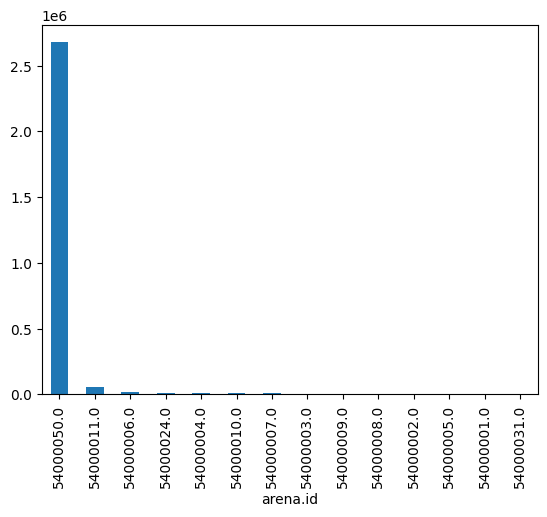

In [55]:
df_clash['arena.id'].value_counts().plot.bar()

The game also includes different "arenas" based on how advanced a player is. Because more advanced players have rarer and more high level cards, this would cause data drift because low arena matches behave differently than high arena matches. Because this would hurt generalization, we may also choose to only keep the most common arena and discard the others. If we have time at the end, we may train a different model on the other arenas. 

We will now analyze the distribution of decks.

In [69]:
df_clash['winner.cards.list'].head()

0    [26000003, 26000004, 26000006, 26000008, 26000...
1    [26000000, 26000010, 26000026, 26000040, 26000...
2    [26000010, 26000042, 26000044, 26000055, 26000...
3    [26000016, 26000023, 26000026, 26000041, 28000...
4    [26000010, 26000014, 26000021, 26000030, 26000...
Name: winner.cards.list, dtype: object

In [76]:
winner_deck_counts = df_clash['winner.cards.list'].value_counts(ascending=False)
winner_deck_counts.head()

winner.cards.list
[26000000, 26000026, 26000030, 26000041, 27000003, 28000003, 28000004, 28000011]    38417
[26000010, 26000014, 26000021, 26000030, 26000038, 27000000, 28000000, 28000011]    32739
[26000004, 26000036, 26000042, 26000046, 26000050, 26000062, 28000008, 28000009]    25585
[26000000, 26000001, 26000010, 26000030, 27000006, 27000008, 28000000, 28000011]    15276
[26000009, 26000015, 26000035, 26000039, 26000048, 28000007, 28000012, 28000015]    11148
Name: count, dtype: int64

In [77]:
winner_deck_counts.describe()

count    1.292041e+06
mean     2.185323e+00
std      6.025442e+01
min      1.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      2.000000e+00
max      3.841700e+04
Name: count, dtype: float64

In [78]:
loser_deck_counts = df_clash['loser.cards.list'].value_counts(ascending=False)
loser_deck_counts.head()

loser.cards.list
[26000000, 26000026, 26000030, 26000041, 27000003, 28000003, 28000004, 28000011]    36179
[26000010, 26000014, 26000021, 26000030, 26000038, 27000000, 28000000, 28000011]    34432
[26000004, 26000036, 26000042, 26000046, 26000050, 26000062, 28000008, 28000009]    22806
[26000000, 26000001, 26000010, 26000030, 27000006, 27000008, 28000000, 28000011]    14740
[26000009, 26000015, 26000035, 26000039, 26000048, 28000007, 28000012, 28000015]    10142
Name: count, dtype: int64

In [79]:
loser_deck_counts.describe()

count    1.384643e+06
mean     2.039173e+00
std      5.659380e+01
min      1.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      2.000000e+00
max      3.617900e+04
Name: count, dtype: float64

Interestingly, the same decks appear many times in the dataset. This could be due to online communities claiming certain "decks" are the best in the season, so more players tend to use them. This may cause the model to memorize popular decks rather than learn general patterns. However, since players reuse decks all the time, this reflects true data distribution. So moving forward, we would have to be careful during the train-test split step to make sure the evaluation is realistic.

Now, we will analyze individual cards. 